In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the JSON data
with open("../data/europepmc_articles.json", "r", encoding="utf-8") as f:
    articles = json.load(f)

In [4]:
# Convert to DataFrame
df = pd.DataFrame(articles)

# Explode mesh_terms into rows
df_exploded = df.explode("mesh_terms")

# Drop missing values (if any)
df_exploded = df_exploded.dropna(subset=["mesh_terms"])

In [10]:

# Count frequency of each MeSH term
mesh_counts = df_exploded["mesh_terms"].value_counts()
mesh_counts

mesh_terms
Humans                                 374
Models, Molecular                      240
Cryoelectron Microscopy                214
Animals                                167
Crystallography, X-Ray                 162
                                      ... 
Urinary Tract Infections                 1
Intracellular Space                      1
Fimbriae, Bacterial                      1
Image Processing, Computer-Assisted      1
Seedlings                                1
Name: count, Length: 2012, dtype: int64

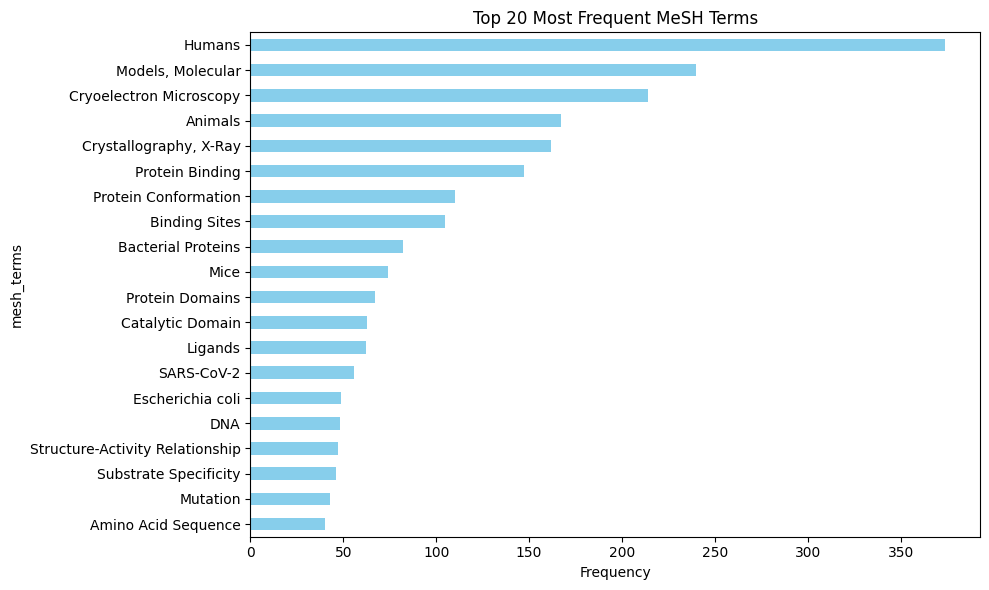

In [12]:
# Select top 20
top_20 = mesh_counts.head(20)

# Plot horizontal bar graph
top_20.sort_values().plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.xlabel("Frequency")
plt.title("Top 20 Most Frequent MeSH Terms")
plt.tight_layout()
plt.show()